In [1]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt

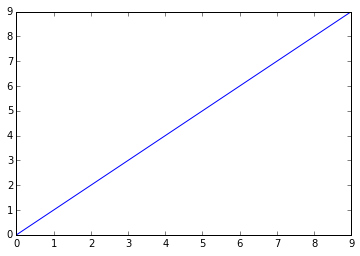

In [6]:
plt.plot(np.arange(10))

In [7]:
fig = plt.figure()

In [9]:
from pandas import Series, DataFrame
import pandas as pd

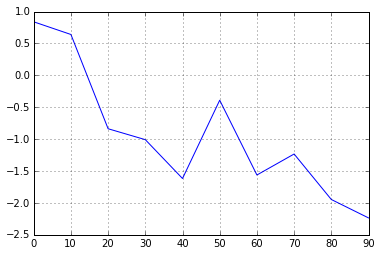

In [10]:
s = Series(np.random.randn(10).cumsum(),
          index=np.arange(0,100,10))
s.plot()

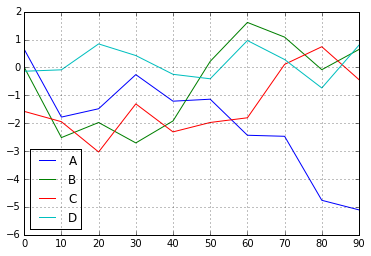

In [11]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
              columns=['A', 'B', 'C', 'D'],
              index=np.arange(0,100, 10))
df.plot()